 # Convolutional Neural Networks

 ## Project: Write an Algorithm for a Dog Identification App

 ---

 In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

 > **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

 In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

 >**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

 The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



 ---
 ### Why We're Here

 In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!).

 ![Sample Dog Output](images/sample_dog_output.png)

 In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

 ### The Road Ahead

 We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

 * [Step 0](#step0): Import Datasets
 * [Step 1](#step1): Detect Humans
 * [Step 2](#step2): Detect Dogs
 * [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
 * [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
 * [Step 5](#step5): Write your Algorithm
 * [Step 6](#step6): Test Your Algorithm

 ---
 <a id='step0'></a>
 ## Step 0: Import Datasets

 Make sure that you've downloaded the required human and dog datasets:
 * Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`.

 * Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.

 *Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

 In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


 <a id='step1'></a>
 ## Step 1: Detect Humans

 In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.

 OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


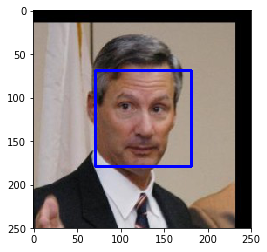

In [2]:
import cv2
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()


 Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.

 In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

 ### Write a Human Face Detector

 We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0


 ### (IMPLEMENTATION) Assess the Human Face Detector

 __Question 1:__ Use the code cell below to test the performance of the `face_detector` function.
 - What percentage of the first 100 images in `human_files` have a detected human face?
 - What percentage of the first 100 images in `dog_files` have a detected human face?

 Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

 __Answer:__
 (You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

humans_in_human = 0
humans_in_dogs = 0
for file in human_files_short:
    if face_detector(file):
        humans_in_human += 1 
for file in dog_files_short:
    if face_detector(file):
        humans_in_dogs +=1

print(f'The face detector is {100 * humans_in_human/len(human_files_short)}% accurate in identifying human faces')
print(f'The face detector found faces in {100 * humans_in_dogs/len(dog_files_short)}% of the dog pictures')


The face detector is 99.0% accurate in identifying human faces
The face detector found faces in 8.0% of the dog pictures


 We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.


 ---
 <a id='step2'></a>
 ## Step 2: Detect Dogs

 In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.

 ### Obtain Pre-trained VGG-16 Model

 The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()


 Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.
 ### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

 In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

 Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    img = Image.open(img_path).convert('RGB')
    size = (224, 224) # VGG16 image size requirements
    transform_chain = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                            (0.229, 0.224, 0.225))
    ])

    img = transform_chain(img).unsqueeze(0)

    if use_cuda:
        img = img.cuda()

    model_out = VGG16(img)

    if use_cuda:
        model_out = model_out.cpu()
    
    prediction = torch.argmax(model_out)
        
    return prediction  # predicted class index


 ### (IMPLEMENTATION) Write a Dog Detector

 While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

 Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    if (prediction > 150 and prediction < 269):
        result = True
    else:
        result = False
    return result # true/false


 ### (IMPLEMENTATION) Assess the Dog Detector

 __Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.
 - What percentage of the images in `human_files_short` have a detected dog?
 - What percentage of the images in `dog_files_short` have a detected dog?

 __Answer:__


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs_in_human = 0
dogs_in_dogs = 0

for file in human_files_short:
    if dog_detector(file):
        dogs_in_human += 1 
for file in dog_files_short:
    if dog_detector(file):
        dogs_in_dogs +=1

print(f'The dog detector found a dog in {100 * dogs_in_human/len(human_files_short)}% of the human face pictures')

print(f'The dog detector found a dog in {100 * dogs_in_dogs/len(dog_files_short)}% of the dog pictures')

The dog detector found a dog in 0.0% of the human face pictures
The dog detector found a dog in 98.0% of the dog pictures


 We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


 ---
 <a id='step3'></a>
 ## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

 Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

 We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.

 Brittany | Welsh Springer Spaniel
 - | -
 <img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

 It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).

 Curly-Coated Retriever | American Water Spaniel
 - | -
 <img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


 Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.

 Yellow Labrador | Chocolate Labrador | Black Labrador
 - | - | -
 <img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="200"> | <img src="images/Labrador_retriever_06449.jpg" width="250">

 We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.

 Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

 ### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

 Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

datadir = {
    'train': 'dogImages/train/',
    'valid': 'dogImages/valid/',
    'test': 'dogImages/test/'
}

transform = {}

trns_normalize = transforms.Normalize((0.5, 0.5, 0.5),
                                      (0.5, 0.5, 0.5))

transform['train'] = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(256),
    transforms.ToTensor(),
    trns_normalize
])

transform['test'] = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    trns_normalize
])

transform['valid'] = transform['test']

datafolder = {}
datafolder['train'] = datasets.ImageFolder(datadir['train'], transform=transform['train'])
datafolder['valid'] = datasets.ImageFolder(datadir['valid'], transform=transform['valid'])
datafolder['test'] = datasets.ImageFolder(datadir['test'], transform=transform['test'])


In [12]:
batch_size = 20
num_workers = 0

loaders_scratch = {}
loaders_scratch['train'] = torch.utils.data.DataLoader(datafolder['train'], batch_size=batch_size, num_workers=num_workers, shuffle=True, drop_last=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(datafolder['valid'], batch_size=batch_size, num_workers=num_workers, shuffle=True, drop_last=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(datafolder['test'], batch_size=batch_size, num_workers=num_workers, shuffle=True, drop_last=True)


 **Question 3:** Describe your chosen procedure for preprocessing the data.
 - How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
 - Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


 # **Answer**:
To preprocess the images, I decided to apply some transforms to augment the dataset for training. The most important thing is to ensure they are all converted to a standard input size, converted to a tensor data type and the pixel values normalized for training.

For data augmentation, I chose to apply a RandomHorizontalFlip and a RandomResizedCrop to an input image size of 256 x 256. I have capable hardware and as many of the images are of higher resolution I wanted to use a slightly larger resolution that 224 x 224.

I use the same transform for validation and testing without any augmentation.

 ### (IMPLEMENTATION) Model Architecture

 Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc_dim = 512*8*8 # depth channels * (image h/w (256) / 2**(# of max pool layers))**2
        self.fc1 = nn.Linear(self.fc_dim,1024)
        self.output = nn.Linear(1024, 133) # 133 dog breed classes
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = x.view(-1, self.fc_dim) # Flatten Image
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.output(x) 

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

# #%%
from torchsummary import summary
summary(model_scratch, (3, 256, 256))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
         MaxPool2d-2         [-1, 32, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          18,496
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5          [-1, 128, 64, 64]          73,856
         MaxPool2d-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 256, 32, 32]         295,168
         MaxPool2d-8          [-1, 256, 16, 16]               0
            Conv2d-9          [-1, 512, 16, 16]       1,180,160
        MaxPool2d-10            [-1, 512, 8, 8]               0
           Linear-11                 [-1, 1024]      33,555,456
          Dropout-12                 [-1, 1024]               0
           Linear-13                  [-1, 133]         136,325
Total params: 35,260,357
Trainable para

 __Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.

 __Answer:__
 For my final CNN architecture, I applied a series of 5 convolutional layers with Max Pooling layers in between to progressively reduce the amount of information in the x-y dimension and increase the depth/# of channels. I then flatten the final tensor and pass it into a fully connected layer for classification as a "hidden layer" before passing on to the final output. I decided to also use a dropout layer to reduce any overfitting from the test data. Based on the labels in the dogImages folder, I knew that I would need 133 classes, so that is the final output size. 

 ### (IMPLEMENTATION) Specify Loss Function and Optimizer

 Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
# Model output should be a class from 
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)


 ### (IMPLEMENTATION) Train and Validate the Model

 Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        torch.enable_grad()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            # train_loss += loss.item()*data.size(0) # From cifar10_cnn_solution.py
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        ######################
        # validate the model #
        ######################
        model.eval()
        torch.no_grad()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [16]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.883261 	Validation Loss: 4.873356
Epoch: 2 	Training Loss: 4.839486 	Validation Loss: 4.762937
Epoch: 3 	Training Loss: 4.752430 	Validation Loss: 4.635123
Epoch: 4 	Training Loss: 4.666424 	Validation Loss: 4.562114
Epoch: 5 	Training Loss: 4.597018 	Validation Loss: 4.553597
Epoch: 6 	Training Loss: 4.523680 	Validation Loss: 4.453425
Epoch: 7 	Training Loss: 4.446722 	Validation Loss: 4.323792
Epoch: 8 	Training Loss: 4.379887 	Validation Loss: 4.218226
Epoch: 9 	Training Loss: 4.310966 	Validation Loss: 4.303689
Epoch: 10 	Training Loss: 4.241575 	Validation Loss: 4.281756
Epoch: 11 	Training Loss: 4.184806 	Validation Loss: 4.388079
Epoch: 12 	Training Loss: 4.112056 	Validation Loss: 4.030873
Epoch: 13 	Training Loss: 4.045155 	Validation Loss: 4.201173
Epoch: 14 	Training Loss: 3.984448 	Validation Loss: 3.979577
Epoch: 15 	Training Loss: 3.909179 	Validation Loss: 3.906164
Epoch: 16 	Training Loss: 3.837879 	Validation Loss: 3.740796
Epoch: 17 	Traini

In [16]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


 ### (IMPLEMENTATION) Test the Model

 Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


Test Loss: 2.744388


Test Accuracy: 32% (267/820)


 ---
 <a id='step4'></a>
 ## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

 You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

 ### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

 Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).

 If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [18]:
## TODO: Specify data loaders
# Use the loaders from before

datadir = {
    'train': 'dogImages/train/',
    'valid': 'dogImages/valid/',
    'test': 'dogImages/test/'
}

trns_normalize = transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])

transform_transfer = {}
transform_transfer['train'] = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        trns_normalize
    ])
transform_transfer['valid'] = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        trns_normalize
    ])
transform_transfer['test'] = transform_transfer['valid']

# Trying out an idiom found in the pytorch docs
datafolder_transfer = {x: datasets.ImageFolder(datadir[x], transform=transform_transfer[x]) for x in ['train', 'valid', 'test']}

batch_size = 20
num_workers = 0

# Trying out an idiom found in the pytorch docs
loaders_transfer = {x: torch.utils.data.DataLoader(datafolder_transfer[x], batch_size=batch_size, num_workers=num_workers, shuffle=True, drop_last=True) 
for x in ['train', 'valid', 'test']}


 ### (IMPLEMENTATION) Model Architecture

 Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
# model_transfer = models.vgg16(pretrained=True)
model_transfer = models.resnet18(pretrained=True)

# Freeze the feature extracter parameters so they don't train.
for param in model_transfer.parameters(): #model_transfer.features.parameters() for vgg16
    param.requires_grad = False

last_layer = nn.Linear(model_transfer.fc.in_features, 133) # 133 dog breed classes
model_transfer.fc = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

summary(model_transfer, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

 __Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

 __Answer:__
 I used the resnet18 architecture as it allows for excellent feature extraction and I can still use the final layer to reclassify for my use-case. I wanted to try resnet so as to try something other than VGG which has been the predominant architecture I have used so far.

 ### (IMPLEMENTATION) Specify Loss Function and Optimizer

 Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.01)


 ### (IMPLEMENTATION) Train and Validate the Model

 Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
n_epochs = 25
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Epoch: 1 	Training Loss: 4.219989 	Validation Loss: 3.122496
Epoch: 2 	Training Loss: 3.035937 	Validation Loss: 2.141439
Epoch: 3 	Training Loss: 2.398002 	Validation Loss: 1.661019
Epoch: 4 	Training Loss: 2.064605 	Validation Loss: 1.346590
Epoch: 5 	Training Loss: 1.811586 	Validation Loss: 1.178592
Epoch: 6 	Training Loss: 1.659311 	Validation Loss: 1.088837
Epoch: 7 	Training Loss: 1.518568 	Validation Loss: 0.980985
Epoch: 8 	Training Loss: 1.457955 	Validation Loss: 0.935583
Epoch: 9 	Training Loss: 1.377470 	Validation Loss: 0.881775
Epoch: 10 	Training Loss: 1.341672 	Validation Loss: 0.830797
Epoch: 11 	Training Loss: 1.298585 	Validation Loss: 0.803534
Epoch: 12 	Training Loss: 1.226315 	Validation Loss: 0.785300
Epoch: 13 	Training Loss: 1.194726 	Validation Loss: 0.738660
Epoch: 14 	Training Loss: 1.176021 	Validation Loss: 0.732140
Epoch: 15 	Training Loss: 1.143279 	Validation Loss: 0.726190
Epoch: 16 	Training Loss: 1.111212 	Validation Loss: 0.695183
Epoch: 17 	Traini

 ### (IMPLEMENTATION) Test the Model

 Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.643438


Test Accuracy: 80% (663/820)


 ### (IMPLEMENTATION) Predict Dog Breed with the Model

 Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.

In [23]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in datafolder_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    size = (224, 224) # ResNet image size requirements
    transform_chain = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                            (0.229, 0.224, 0.225))
    ])

    img = transform_chain(img).unsqueeze(0)

    if use_cuda:
        img = img.cuda()

    model_out = model_transfer(img)

    if use_cuda:
        model_out = model_out.cpu()
    
    prediction = torch.argmax(model_out)
    
    return class_names[prediction]  # predicted class label


 ---
 <a id='step5'></a>
 ## Step 5: Write your Algorithm

 Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
 - if a __dog__ is detected in the image, return the predicted breed.
 - if a __human__ is detected in the image, return the resembling dog breed.
 - if __neither__ is detected in the image, provide output that indicates an error.

 You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.

 Some sample output for our algorithm is provided below, but feel free to design your own user experience!

 ![Sample Human Output](images/sample_human_output.png)


 ### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print(f'There is a human in the picture!\nThe human looks like a {predict_breed_transfer(img_path)}')
    elif dog_detector(img_path):
        print(f'Doggy! {predict_breed_transfer(img_path)}')
    else:
        print('There is no human or dog in this picture!')
    img = plt.imread(img_path, 3)
    plt.imshow(img)
    plt.show()

 ---
 <a id='step6'></a>
 ## Step 6: Test Your Algorithm

 In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

 ### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

 Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.

 __Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

 __Answer:__ (Three possible points for improvement) 
The output is pretty good. I'm impressed that the confusion is mostly in thinking that cats have human faces.
 1. Teach the model to identify a neither dog nor human category to better catch that case
 2. Display the human face box on any images with a face in order to "troubleshoot" non-human faces identified as human
 3. I could increase the data augmentation and improve the depth of the classification step itself

There is a human in the picture!
The human looks like a Smooth fox terrier


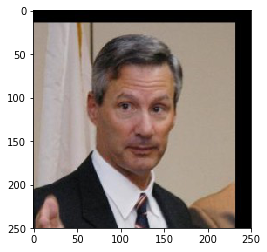

There is a human in the picture!
The human looks like a Chinese crested


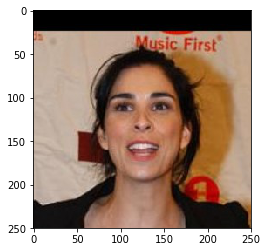

There is a human in the picture!
The human looks like a Basenji


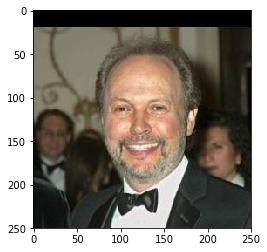

Doggy! Entlebucher mountain dog


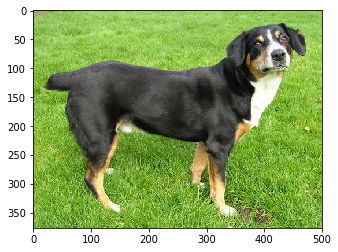

Doggy! Entlebucher mountain dog


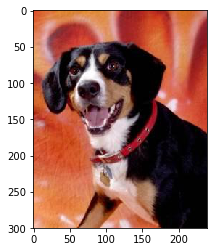

Doggy! Entlebucher mountain dog


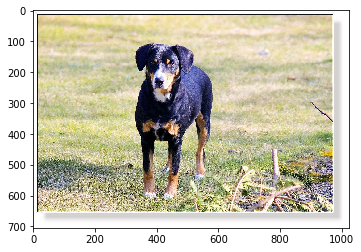

myImages/human2.jpg:
There is a human in the picture!
The human looks like a Maltese


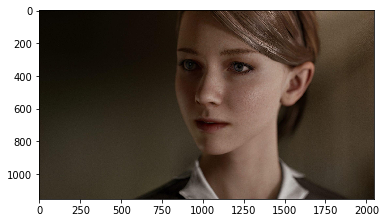

myImages/dog2.jpg:
Doggy! Basenji


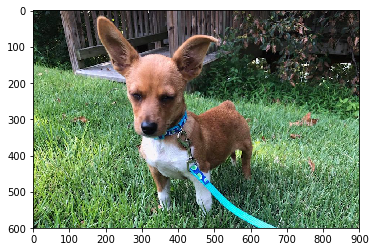

myImages/cat2.jpg:
There is a human in the picture!
The human looks like a Finnish spitz


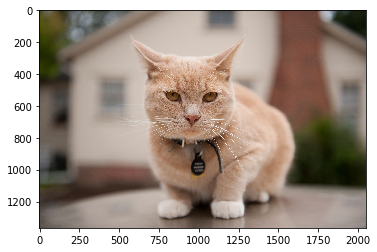

myImages/human1.jpg:
There is a human in the picture!
The human looks like a Black and tan coonhound


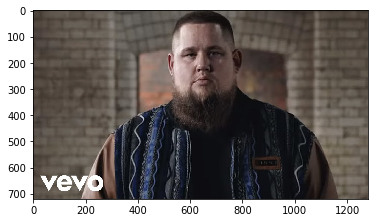

myImages/cat1.jpg:
There is a human in the picture!
The human looks like a German shorthaired pointer


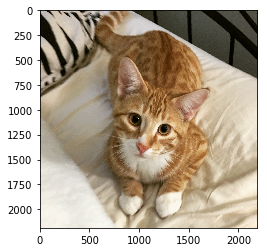

myImages/dog1.jpg:
Doggy! Cavalier king charles spaniel


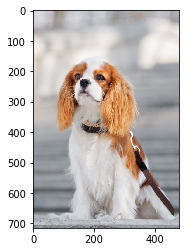

In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

for file in np.array(glob("myImages/*")):
    print(f'{file}:')
    run_app(file)